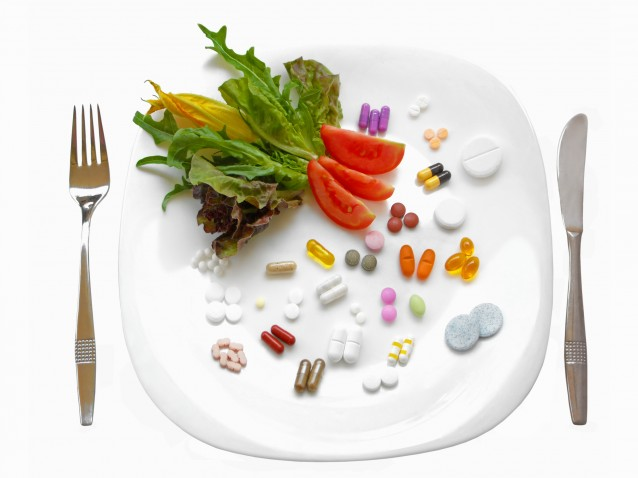

#**MICROSOFT MENTEE ENGAGE PROGRAM'22**

#**DIET AND DRUG RECOMMENDATION SYSTEM**

##**NAME : G. HARINISRI** 

PROPOSED IDEA :

The goal of application is to provide a platform where users find their Nutritious food according to their personal health preferences according to their BMI and recommend food separately for weight loss and gain categories  and build a behavior of living healthy life and I have  also build the recommendation system wherein it helps to  identify the suitable drug names that can be recommended for the diseases respectively.

Polycystic Ovary Syndrome, or PCOS, is a health condition that affects about 10 million people in the world. The exact cause is unknown, but it is considered a hormonal problem. Genetics and environmental factors are believed to be involved in the development of PCOS. It is a leading cause of female infertility and is responsible for a number of symptoms that can affect the body physically and emotionally.

In order to solve this problem of PCOD and support the woman community, I have developed PCOD recommendation system and a predictive system by comparing 5 different Machine Learning models accuracy and finding the most efficient model and using it for a more precise diagnosis and partially developed an website with integrating these ideas together for girls and woman to get their inputs and be aware of their conditions along with diet and drug to be taken .

###IMPORTING THE REQUIRED LIBRARIES AND PACKAGES

In [1]:
!pip install django
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import warnings
import time
import seaborn as sns
import matplotlib.pyplot as plt
import random
import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re 
import sklearn
from sklearn.neighbors import NearestNeighbors
from collections import Counter
!pip install lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from joblib import dump
!pip3 install catboost
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from catboost import CatBoostClassifier
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 76.6 MB 1.3 MB/s 


**FOR PERSONALIZED MEAL AND DIET RECOMMENDATION**        
**flow of project:**   
Data collection - data is collected by web scraping (projects works on demo data).        
Data processing - data is processed and required attributes are added to make demo datasets.       
User's profile generation by taking input from them .         
Initial recommendation on the basis of user's profile (Content-based,implemented by k-nearest neighbors).
Recommendation based on similar profiles to users.       
Recommendation on the basis of users past/recent activity (Collaborative Memory based approach,implemented by K-nearest neighbors).              
- Technology used -    
Python and its libraries     
For Web scraping - Beautifulsoup, requests    
For Maintaing/handeling data and Data processing- Pandas,numpy,time,datetime,random,nltk    
For Recommendation - sklearn      

###IMPORTING THE DATASETS AND PERFORMING EXPLORATORY DATA ANALYSIS ON EACH DATASET 
Why to perform EDA on the datasets?   
The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

In [2]:
data = pd.read_csv("/content/drive/MyDrive/data.csv")
data

,Unnamed: 0,Name,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,...,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,catagory,description,sub_catagory
0,0,Summer Squash Salad,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy
1,1,Chicken Minced Salad,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy
2,2,Sweet Chilli Almonds,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy
3,3,Tricolour Salad,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy
4,4,Sakkarai Pongal,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,118,Vada pav,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,NaN,A popular vegetarian fast food dish native to ...,NaN
1947,119,Vadai,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,NaN,"A savory fritter-type snack from South India,[...",NaN
1948,121,Main article,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,NaN,\nMain article\nAndhra\nChettinad\nKarnataka\n...,NaN
1949,134,American,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,NaN,\nAmerican\nBritish\nCornish\nDutch\nEnglish\n...,NaN


In [3]:
#printing the shape 
data.shape

(1951, 27)

In [4]:
#describing the dataset
data.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1
count,1951.00,1847.00,1763.00,1457.00,1385.00,1313.00,1241.00,1169.00,1097.00,1025.00,...,792.00,720.00,648.00,576.00,504.00,432.00,360.00,288.00,216.00,144.00
mean,877.06,842.92,628.88,659.56,623.74,587.95,552.18,516.43,480.73,459.06,...,330.05,294.70,259.50,224.50,189.79,155.50,121.90,89.50,59.50,71.50
std,553.93,527.12,441.06,415.14,394.09,373.01,351.91,330.77,309.59,291.26,...,219.20,197.62,175.91,154.01,131.89,109.45,86.62,63.32,39.89,41.71
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,383.50,377.50,222.50,292.00,274.00,256.00,238.00,220.00,202.00,200.00,...,125.75,107.75,89.75,71.75,62.75,53.75,44.75,35.75,26.75,35.75
50%,871.00,839.00,575.00,656.00,620.00,584.00,548.00,512.00,476.00,456.00,...,323.50,287.50,251.50,215.50,179.50,143.50,107.50,71.50,53.50,71.50
75%,1358.50,1300.50,1015.50,1020.00,966.00,912.00,858.00,804.00,750.00,712.00,...,521.25,467.25,413.25,359.25,305.25,251.25,197.25,143.25,89.25,107.25
max,1846.00,1762.00,1456.00,1384.00,1312.00,1240.00,1168.00,1096.00,1024.00,968.00,...,719.00,647.00,575.00,503.00,431.00,359.00,287.00,215.00,143.00,143.00


In [5]:
#extracting the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unnamed: 0                                              1951 non-null   int64  
 1   Name                                                    1951 non-null   object 
 2   Unnamed: 0.1                                            1847 non-null   float64
 3   Unnamed: 0.1.1                                          1763 non-null   float64
 4   Unnamed: 0.1.1.1                                        1457 non-null   float64
 5   Unnamed: 0.1.1.1.1                                      1385 non-null   float64
 6   Unnamed: 0.1.1.1.1.1                                    1313 non-null   float64
 7   Unnamed: 0.1.1.1.1.1.1                                  1241 non-null   float64
 8   Unnamed: 0.1.1.1.1.1.1.1              

In [6]:
#checking if there is any null/missing values
data.isnull().sum()

Unnamed: 0                                                   0
Name                                                         0
Unnamed: 0.1                                               104
Unnamed: 0.1.1                                             188
Unnamed: 0.1.1.1                                           494
Unnamed: 0.1.1.1.1                                         566
Unnamed: 0.1.1.1.1.1                                       638
Unnamed: 0.1.1.1.1.1.1                                     710
Unnamed: 0.1.1.1.1.1.1.1                                   782
Unnamed: 0.1.1.1.1.1.1.1.1                                 854
Unnamed: 0.1.1.1.1.1.1.1.1.1                               926
Unnamed: 0.1.1.1.1.1.1.1.1.1.1                             982
Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1                          1015
Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1                        1087
Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1                      1159
Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1                 

In [7]:
dataset = pd.read_csv("/content/drive/MyDrive/dataset.csv")
dataset

,Meal_Id,Name,catagory,description,Veg_Non,Nutrient,Disease,Diet,Price
0,meal_id1,summer squash salad,salad,"white balsamic vinegar, lemon juice, lemon rin...",veg,fiber,obesity diabeties hypertension goitre,alkaline_diet low_fat_diet ketogenic_diet low...,485
1,meal_id2,chicken minced salad,salad,"olive oil, chicken mince, garlic (minced), oni...",non-veg,fiber,anemia pregnancy hypertension rickets goitre ...,low_fat_diet low_carb_diet ketogenic_diet low...,600
2,meal_id3,sweet chilli almonds,chilli,"almonds whole, egg white, curry leaves, salt, ...",veg,vitamin_a,hypertension scurvy heart_disease goitre kidn...,alkaline_diet low_fat_diet paleo_diet Mediter...,255
3,meal_id4,tricolour salad,salad,"vinegar, honey/sugar, soy sauce, salt, garlic ...",veg,fiber,obesity goitre hypertension,low_fat_diet ketogenic_diet low_sodium_diet h...,615
4,meal_id5,gluten-free christmas cake,cake,"christmas dry fruits (pre-soaked), orange zest...",veg,vitamin_a,goitre kidney_disease,high_protien_diet,465
...,...,...,...,...,...,...,...,...,...
507,meal_id305,sunga pork,curry,curry,veg,iron,pregnancy goitre,low_fat_diet paleo_diet vegan_diet high_fiber...,605
508,meal_id306,banana chips,banana,r dried slices of bananas (fruits of herbaceou...,veg,magnesium,hypertension,alkaline_diet high_protien_diet vegan_diet hi...,295
509,meal_id307,bhurji- egg,egg,"made using indian spices, onion, tomatoes, gre...",non-veg,vitamin_a,hypertension rickets goitre kidney_disease pr...,low_sodium_diet high_protien_diet low_fat_die...,645
510,meal_id308,flattened rice / pohe,rice,"ible, dehusked rice which is flattened into fl...",veg,carbohydrates,anemia cancer scurvy heart_disease eye_diseas...,alkaline_diet low_fat_diet ketogenic_diet veg...,525


In [8]:
#printing the shape
dataset.shape

(512, 9)

In [9]:
#describing the dataset
dataset.describe()

,Price
count,512.00
mean,442.83
std,146.94
min,200.00
25%,318.75
50%,447.50
75%,570.00
max,695.00


In [10]:
#printing the information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Meal_Id      512 non-null    object
 1   Name         512 non-null    object
 2   catagory     512 non-null    object
 3   description  511 non-null    object
 4   Veg_Non      512 non-null    object
 5   Nutrient     512 non-null    object
 6   Disease      512 non-null    object
 7   Diet         512 non-null    object
 8   Price        512 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 36.1+ KB


In [11]:
#checking if there any missing / null values
dataset.isnull().sum()

Meal_Id        0
Name           0
catagory       0
description    1
Veg_Non        0
Nutrient       0
Disease        0
Diet           0
Price          0
dtype: int64

In [12]:
recent_activity = pd.read_csv("/content/drive/MyDrive/recent_activity.csv")
recent_activity

,User_Id,Meal_Id,Rated,Liked,Searched,Purchased,Timestamp
0,User_19,meal_id3,1,0,0,0,2020-03-01 12:03:24
1,User_69,meal_id7,0,1,0,0,2020-03-04 00:20:24
2,User_20,meal_id9,1,0,0,1,2020-03-05 14:31:10
3,User_96,meal_id10,0,0,1,1,2020-03-05 22:33:26
4,User_63,meal_id20,0,0,1,1,2020-03-07 06:42:30
5,User_63,meal_id21,0,1,0,1,2020-03-07 14:44:46
6,User_91,meal_id28,0,1,0,1,2020-03-09 10:57:14
7,User_31,meal_id29,1,0,0,1,2020-03-09 16:58:56
8,User_25,meal_id30,0,0,1,0,2020-03-10 01:01:12
9,User_89,meal_id24,1,0,0,1,2020-03-12 21:20:28


In [13]:
#printing the shape 
recent_activity.shape

(30, 7)

In [14]:
#describing the dataset
recent_activity.describe()

,Rated,Liked,Searched,Purchased
count,30.00,30.00,30.00,30.00
mean,0.33,0.30,0.37,0.80
std,0.48,0.47,0.49,0.41
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,1.00
50%,0.00,0.00,0.00,1.00
75%,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00


In [15]:
#printing the information
recent_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_Id    30 non-null     object
 1   Meal_Id    30 non-null     object
 2   Rated      30 non-null     int64 
 3   Liked      30 non-null     int64 
 4   Searched   30 non-null     int64 
 5   Purchased  30 non-null     int64 
 6   Timestamp  30 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.8+ KB


In [16]:
#checking if there is any missing/ null values
recent_activity.isnull().sum()

User_Id      0
Meal_Id      0
Rated        0
Liked        0
Searched     0
Purchased    0
Timestamp    0
dtype: int64

In [17]:
user_Profiles = pd.read_csv("/content/drive/MyDrive/user_Profiles.csv")
user_Profiles

,User_Id,Veg_Non,Nutrient,Disease,Diet
0,User_1,non-veg,chloride,anemia kidney_disease goitre rickets pregnancy,type_a_diet high_protien_diet low_carb_diet l...
1,User_2,veg,chloride,goitre,high_fiber_diet vegan_diet
2,User_3,veg,magnesium,cancer hypertension goitre heart_disease scurvy,high_fiber_diet ketogenic_diet high_protien_diet
3,User_4,veg,vitamin_e,cancer kidney_disease obesity anemia heart_di...,high_fiber_diet ketogenic_diet gluten_free_di...
4,User_5,non-veg,vitamin_c,anemia kidney_disease goitre rickets pregnancy,type_a_diet high_protien_diet low_carb_diet l...
...,...,...,...,...,...
93,User_96,non-veg,iron,anemia kidney_disease goitre rickets pregnancy,type_a_diet high_protien_diet high_fiber_diet...
94,User_97,veg,iron,goitre,high_fiber_diet low_sodium_diet vegan_diet lo...
95,User_98,veg,selenium,hypertension,high_fiber_diet ketogenic_diet low_fat_diet v...
96,User_99,veg,chloride,goitre,high_fiber_diet vegan_diet


In [18]:
#printing the shape
user_Profiles.shape

(98, 5)

In [19]:
#describing the dataset
user_Profiles.describe()

,User_Id,Veg_Non,Nutrient,Disease,Diet
count,98,98,98,98,98
unique,98,2,15,47,55
top,User_2,veg,iron,anemia kidney_disease goitre rickets pregnancy,type_a_diet high_protien_diet high_fiber_diet...
freq,1,68,21,13,9


In [20]:
#printing the information
user_Profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   98 non-null     object
 1   Veg_Non   98 non-null     object
 2   Nutrient  98 non-null     object
 3   Disease   98 non-null     object
 4   Diet      98 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [21]:
#checking if there is any missing /null values
user_Profiles.isnull().sum()

User_Id     0
Veg_Non     0
Nutrient    0
Disease     0
Diet        0
dtype: int64

In [22]:
food = pd.read_csv("/content/drive/MyDrive/food.csv")
food

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
0,Asparagus Cooked,0,1,1,,22,0.20,2.40,0.91,23.00,14,224.00,4.10,2.00,0,1.30
1,Avocados,1,0,0,0,160,15.00,2.00,0.55,12.00,7,485.00,8.50,6.70,0,0.70
2,Bananas,1,0,0,0,89,0.30,1.10,0.26,5.00,1,358.00,23.00,2.60,0,12.00
3,Bagels made in wheat,0,1,1,0,250,1.50,10.00,2.76,20.00,439,165.00,49.00,4.10,0,6.10
4,Berries,1,0,0,0,349,0.40,14.00,6.80,190.00,298,77.00,77.00,13.00,0,46.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Vanilla Ice cream,0,0,1,0,207,11.00,3.50,0.09,128.00,80,199.00,24.00,0.70,0,21.00
85,Strawberry Icecream,0,0,1,0,192,8.40,3.20,0.21,120.00,60,188.00,28.00,0.90,0,0.00
86,Marshmallows,0,0,1,0,318,0.20,1.80,0.23,3.00,80,5.00,81.00,0.10,0,58.00
87,Chocolate milk,1,0,0,0,535,30.00,7.70,2.35,189.00,79,372.00,59.00,3.40,0,52.00


In [23]:
#printing the shape
food.shape

(89, 16)

In [24]:
#describing the dataset
food.describe()

,Breakfast,Lunch,Dinner,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
count,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00,89.00
mean,0.47,0.51,0.69,210.31,8.58,8.57,3.71,64.50,250.89,247.80,26.47,3.00,11.52,8.01
std,0.50,0.50,0.47,155.35,11.38,8.84,8.55,112.05,323.15,194.79,25.05,5.04,59.07,16.44
min,0.00,0.00,0.00,1.00,0.00,0.00,0.02,0.00,0.00,0.20,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,89.00,0.40,2.30,0.50,8.30,7.00,117.00,7.00,0.20,0.00,0.00
50%,0.00,1.00,1.00,184.00,3.70,4.50,1.18,18.00,80.00,211.00,21.00,1.50,0.00,1.30
75%,1.00,1.00,1.00,318.00,12.00,13.00,2.78,63.00,381.00,334.00,33.00,3.10,0.00,5.70
max,1.00,1.00,1.00,579.00,50.00,46.00,57.00,631.00,1531.00,1129.00,91.00,34.00,435.00,82.00


In [25]:
#printing the information
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     89 non-null     object 
 1   Breakfast      89 non-null     int64  
 2   Lunch          89 non-null     int64  
 3   Dinner         89 non-null     int64  
 4   VegNovVeg      89 non-null     object 
 5   Calories       89 non-null     int64  
 6   Fats           89 non-null     float64
 7   Proteins       89 non-null     float64
 8   Iron           89 non-null     float64
 9   Calcium        89 non-null     float64
 10  Sodium         89 non-null     int64  
 11  Potassium      89 non-null     float64
 12  Carbohydrates  89 non-null     float64
 13  Fibre          89 non-null     float64
 14  VitaminD       89 non-null     int64  
 15  Sugars         89 non-null     float64
dtypes: float64(8), int64(6), object(2)
memory usage: 11.2+ KB


In [26]:
#checking if there is any null/missing values
food.isnull().sum()

Food_items       0
Breakfast        0
Lunch            0
Dinner           0
VegNovVeg        0
Calories         0
Fats             0
Proteins         0
Iron             0
Calcium          0
Sodium           0
Potassium        0
Carbohydrates    0
Fibre            0
VitaminD         0
Sugars           0
dtype: int64

In [27]:
nutrition_distribution = pd.read_csv("/content/drive/MyDrive/nutrition_distriution.csv")
nutrition_distribution

,0Calories,1Fats (gm),2Proteins(g),3Iron(mg),4Calcium(mg),5Sodium(mg),6Potassium(mg),7Carbohydrates (gm),8Fibre (gm),9Vitamin D (mcg),10Sugars (gm)
0,160,15.00,2.00,0.55,12,7,485.00,8.50,6.70,0,0.70
1,89,0.30,1.10,0.26,5,1,358.00,8.50,2.60,0,12.00
2,349,0.40,14.00,6.80,190,298,77.00,8.50,13.00,0,46.00
3,331,24.00,20.00,0.84,497,966,363.00,8.50,0.00,0,0.00
4,2,0.00,0.30,0.02,2,1,50.00,8.50,0.00,0,0.00
5,97,1.40,3.30,0.55,2,253,3.30,8.50,2.70,0,7.70
6,93,2.10,5.60,2.63,2,9,272.00,8.50,11.00,0,6.30
7,97,6.90,3.80,0.12,2,52,178.00,8.50,0.00,0,0.00
8,553,44.00,18.00,6.68,2,12,660.00,8.50,3.30,0,5.90
9,97,0.20,1.50,0.80,2,3,212.00,8.50,11.00,0,0.00


In [28]:
#printing the shape
nutrition_distribution.shape

(42, 11)

In [29]:
#describing the dataset
nutrition_distribution.describe()

,0Calories,1Fats (gm),2Proteins(g),3Iron(mg),4Calcium(mg),5Sodium(mg),6Potassium(mg),7Carbohydrates (gm),8Fibre (gm),9Vitamin D (mcg),10Sugars (gm)
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,211.29,9.24,6.80,4.07,18.57,185.38,239.46,8.50,4.51,13.86,10.65
std,184.94,14.36,8.82,7.52,80.99,301.40,220.84,0.00,6.86,54.44,19.79
min,1.00,0.00,0.00,0.02,2.00,1.00,0.20,8.50,0.00,0.00,0.00
25%,63.25,0.23,1.42,0.33,2.00,3.25,95.75,8.50,0.38,0.00,0.28
50%,140.50,1.80,3.55,0.82,2.00,38.00,179.00,8.50,2.50,0.00,2.42
75%,373.25,13.62,8.68,3.63,2.00,277.75,348.00,8.50,3.38,0.00,7.77
max,579.00,50.00,46.00,37.40,497.00,1531.00,1129.00,8.50,34.00,286.00,82.00


In [30]:
#printing the information
nutrition_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   0Calories            42 non-null     int64  
 1   1Fats (gm)           42 non-null     float64
 2   2Proteins(g)         42 non-null     float64
 3   3Iron(mg)            42 non-null     float64
 4   4Calcium(mg)         42 non-null     int64  
 5   5Sodium(mg)          42 non-null     int64  
 6   6Potassium(mg)       42 non-null     float64
 7   7Carbohydrates (gm)  42 non-null     float64
 8   8Fibre (gm)          42 non-null     float64
 9   9Vitamin D (mcg)     42 non-null     int64  
 10  10Sugars (gm)        42 non-null     float64
dtypes: float64(7), int64(4)
memory usage: 3.7 KB


In [31]:
#checking if there is any null / missing values
nutrition_distribution.isnull().sum()

0Calories              0
1Fats (gm)             0
2Proteins(g)           0
3Iron(mg)              0
4Calcium(mg)           0
5Sodium(mg)            0
6Potassium(mg)         0
7Carbohydrates (gm)    0
8Fibre (gm)            0
9Vitamin D (mcg)       0
10Sugars (gm)          0
dtype: int64

###PREPROCESSING
Why to perform preprocessing ?
Data Preprocessing is required because:

Real world data are generally:

Incomplete: Missing attribute values, missing certain attributes of importance, or having only aggregate data

Noisy: Containing errors or outliers

Inconsistent: Containing discrepancies in codes or names.

In order to overcome the above problems and handle the datat to produce efficient results we perform  preprocessing.

###VISUALIZATION
Why is it important to visualization?     

Visualization lets you comprehend vast amounts of data at a glance and in a better way. It helps to understand the data better to measure its impact on the business and communicates the insight visually to internal and external audiences

In [32]:
#remove unncessary columns
l = ['Name','sub_catagory','catagory','description']
drop = []
columns = list(data.columns)
for col in columns:
    if col not in l:
        drop.append(col)
if drop!=[]:
    df = data.drop(drop,axis=1)

In [33]:
#adding veg/non veg col
l = ['chicken','wings','meat','salmon','salmons','cob','cobs','kebab','kebabs','fish','snake','gosht','bacon','mutton','lamb','egg','eggs']
nv = ['chicken','meat']
vg_nv = []

for name,cat in zip(df.Name,df.catagory):
    n = name.split()
    f=0
    if cat in nv:
        vg_nv.append('non-veg')
    else: 
        for i in n:
            if i.lower() in l:
                f=1
        if f==1:
            vg_nv.append('non-veg')
        else:
            vg_nv.append('veg')
            
df['Veg_Non'] = vg_nv
df.head()

,Name,catagory,description,sub_catagory,Veg_Non
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg


veg        1646
non-veg     305
Name: Veg_Non, dtype: int64


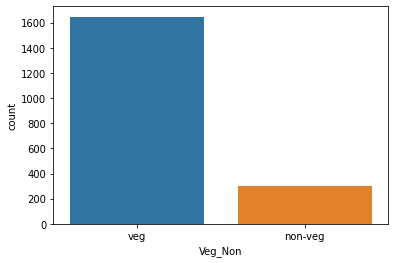

In [34]:
#visualization
print(df.Veg_Non.value_counts())
sns.countplot(df.Veg_Non)
plt.savefig('vegnon.png')

In [35]:
#adding column review
review = []
for i in range(df.shape[0]):
    review.append(random.randint(1,10))
df['Review'] = review
df.head()

,Name,catagory,description,sub_catagory,Veg_Non,Review
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,4
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,1
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,2
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg,8
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg,5


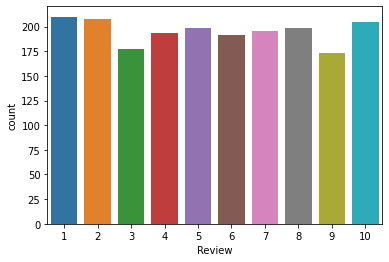

In [36]:
sns.countplot(df.Review)

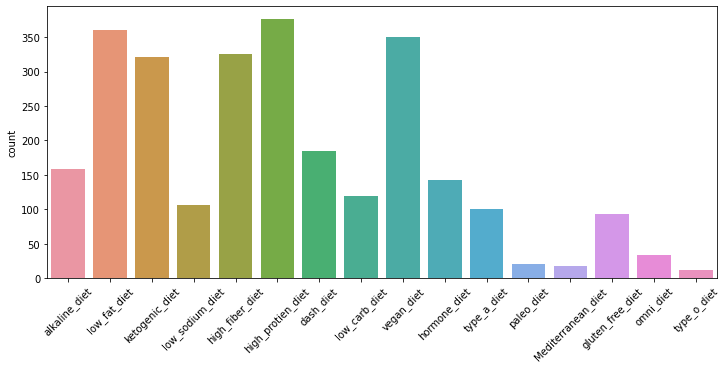

In [37]:
plt.figure(figsize=(12,5))
diet = []
for i in range(dataset.shape[0]):
    for j in dataset.loc[i,'Diet'].split():
        diet.append(j)
        
        
sns.countplot(diet)
plt.xticks(rotation=45)
plt.savefig('diet.png')
plt.show()

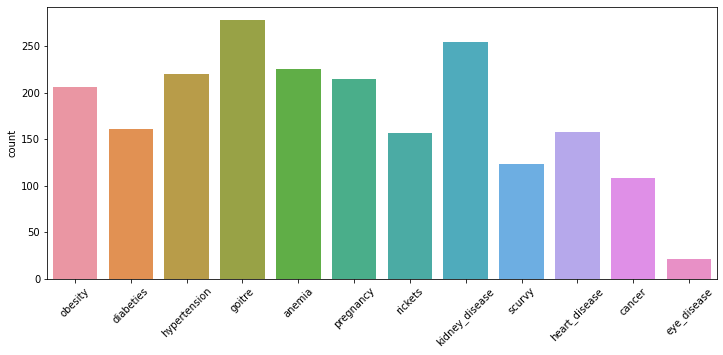

In [38]:
plt.figure(figsize=(12,5))
disease = []
for i in range(dataset.shape[0]):

    for j in (dataset.loc[i,'Disease']).split():
        disease.append(j)

sns.countplot(disease)
plt.xticks(rotation=45)
plt.savefig('disease.png')
plt.show()

In [39]:
#User based Recommendation (Collaborative filtering)
#if user A and user B share similar profile then meal liked by User B but not rated by A are recommended to A
#User-based: measure the similarity between target users and other users
#Collaborative filtering systems make recommendations based on historic users’ preference for items (clicked, watched, purchased, liked, rated, etc.).
#Algorithm - K_Nearest-neighbor on two dataset recent activity and user profile


class Recommender:
    
    def __init__(self):
        self.df = pd.read_csv('/content/drive/MyDrive/user_Profiles.csv')
        self.activity = pd.read_csv('/content/drive/MyDrive/recent_activity.csv')
    
    def get_features(self):
        #getting dummies of dataset
        nutrient_dummies = self.df.Nutrient.str.get_dummies()
        disease_dummies = self.df.Disease.str.get_dummies(sep=' ')
        diet_dummies = self.df.Diet.str.get_dummies(sep=' ')
        feature_df = pd.concat([nutrient_dummies,disease_dummies,diet_dummies],axis=1)
     
        return feature_df
    
    def k_neighbor(self,inputs):
        
        feature_df = self.get_features()
        
        #initializing model with k=20 neighbors
        model = NearestNeighbors(n_neighbors=6,algorithm='ball_tree')
        
        # fitting model with dataset features
        model.fit(feature_df)
        
        df_results = pd.DataFrame(columns=list(self.df.columns))
        
      
        # getting distance and indices for k nearest neighbor
        distnaces , indices = model.kneighbors(inputs)

        for i in list(indices):
            df_results = df_results.append(self.df.loc[i])
                
#         df_results = df_result
        
        df_results = df_results.reset_index(drop=True)
        return df_results
    
    def user_based(self,user_profile,user_id):
        
        data = self.get_features()
        total_features = data.columns
        d = dict()
        for i in total_features:
            d[i]= 0
        for i in user_profile:
            d[i] = 1
        final_input = list(d.values())
        
        similar_users = self.k_neighbor([final_input])
        users = list(similar_users.User_Id)
        results = self.activity[self.activity.User_Id.isin(users)] #taking acitivies
        results = results[results['User_Id']!=user_id] # selecting those which are not reviewed by user
        results = results.filter(['Name','Nutrient','Veg_Non','Price','Review','Diet','Disease','description'])

        results = results.drop_duplicates(subset=['Name'])
        results = results.reset_index(drop=True)
        return results

In [40]:
#an example for the above recommendation system
profile_A = ['calcium','iron','diabeties','gluten_free_diet']
user_id = 'User_71' 

In [41]:
ob = Recommender()
data = ob.get_features()
total_features = data.columns
d = dict()
for i in total_features:
    d[i]= 0
for i in profile_A:
    d[i] = 1

final_input = list(d.values())
similar_users = ob.k_neighbor([final_input]) # pass 2d array []
similar_users

,User_Id,Veg_Non,Nutrient,Disease,Diet
0,User_23,veg,protien,hypertension,gluten_free_diet
1,User_9,veg,iron,hypertension,high_fiber_diet gluten_free_diet vegan_diet l...
2,User_26,veg,iron,hypertension,high_fiber_diet gluten_free_diet vegan_diet l...
3,User_79,veg,sodium,obesity,alkaline_diet
4,User_53,non-veg,iron,goitre,high_fiber_diet vegan_diet low_fat_diet
5,User_83,veg,protien,hypertension,dash_diet gluten_free_diet high_protien_diet


In [42]:
meal_ids = list(recent_activity.Meal_Id.unique())
recent_data = dataset[dataset.Meal_Id.isin(meal_ids)][['Nutrient','catagory','Disease','Diet']].reset_index(drop=True)

calcium          22
iron             16
magnesium        16
vitamin_c         8
vitamin_a         6
selenium          5
potassium         5
sodium            4
fiber             4
carbohydrates     3
chloride          2
Name: Nutrient, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

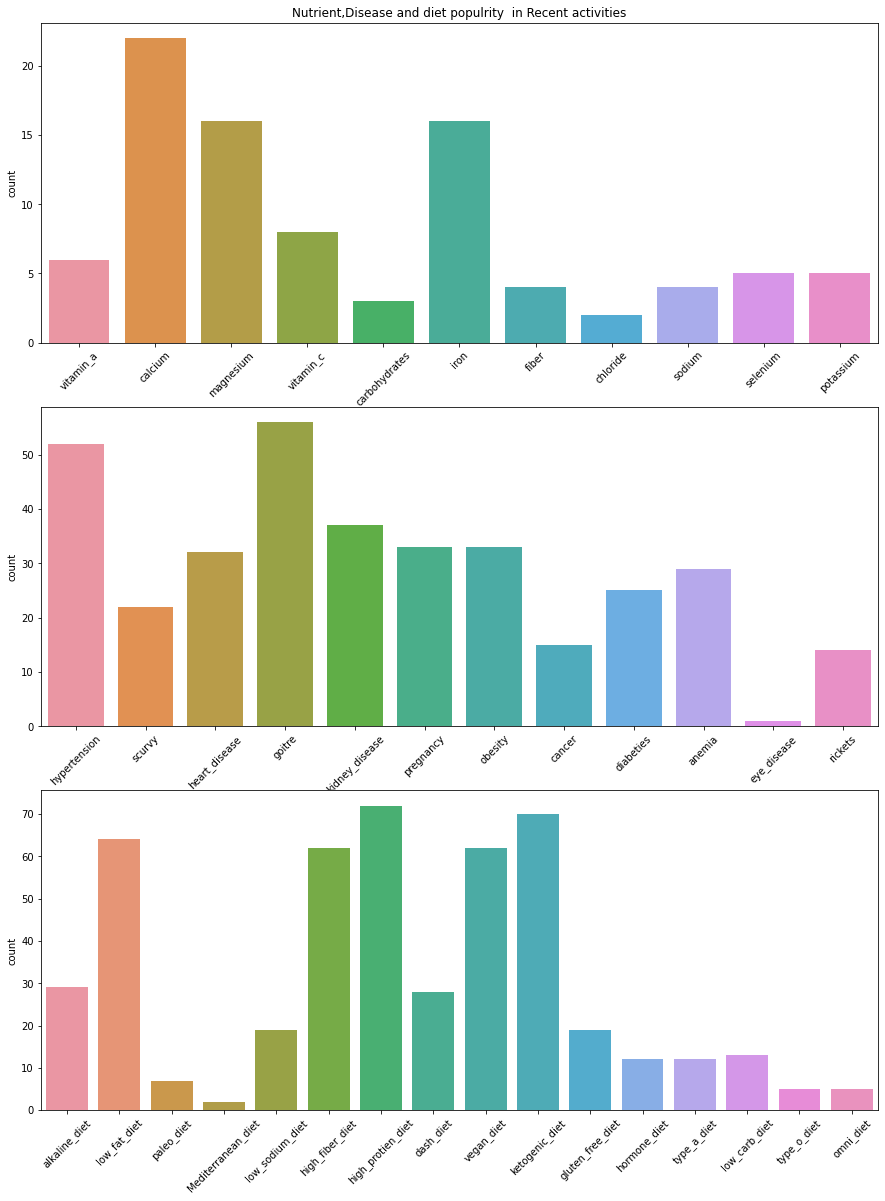

In [43]:
plt.figure(figsize=(15,20))
plt.subplot(3,1,1)
plt.xticks(rotation=45)
plt.title('Nutrient,Disease and diet populrity  in Recent activities')
print(recent_data.Nutrient.value_counts())

sns.countplot(recent_data.Nutrient)
disease = []
for i in range(recent_data.shape[0]):
    for j in recent_data.loc[i,'Disease'].split():
        disease.append(j)

plt.subplot(3,1,2)    
sns.countplot(disease)
plt.xticks(rotation=45)

diet = []
for i in range(recent_data.shape[0]):
    for j in recent_data.loc[i,'Diet'].split():
        diet.append(j)

plt.subplot(3,1,3)    
sns.countplot(diet)
plt.xticks(rotation=45)

In [44]:
#feature selection
value_counts = recent_data.Nutrient.value_counts()
m = recent_data.Nutrient.value_counts().mean()
print('mean occurance',m)
features = list(value_counts[recent_data.Nutrient.value_counts()>m].index)
value_counts[recent_data.Nutrient.value_counts()>m]

mean occurance 8.272727272727273


calcium      22
iron         16
magnesium    16
Name: Nutrient, dtype: int64

###PERSONALIZED MEAL AND DIET RECOMMENDATION SYSTEM 

In [45]:
class Recommender:
    
    def __init__(self,profiles,recent_activity,dataset):
        self.df = dataset
        self.profiles = profiles
        self.recent_activity = recent_activity
    
    def get_features(self,dataframe):
        #getting dummies of dataset
        nutrient_dummies = dataframe.Nutrient.str.get_dummies()
        disease_dummies = dataframe.Disease.str.get_dummies(sep=' ')
        diet_dummies = dataframe.Diet.str.get_dummies(sep=' ')
        feature_df = pd.concat([nutrient_dummies,disease_dummies,diet_dummies],axis=1)
     
        return feature_df
    
    def find_neighbors(self,dataframe,features,k):
        features_df = self.get_features(dataframe)
        total_features = features_df.columns  
        d = dict()
        for i in total_features:
            d[i]= 0
        for i in features:
            d[i] = 1
        final_input = list(d.values())
        
        similar_neighbors = self.k_neighbor([final_input],features_df,dataframe,k)
        return similar_neighbors
    
    def k_neighbor(self,inputs,feature_df,dataframe,k):
        
        #initializing model with k neighbors
        model = NearestNeighbors(n_neighbors=k,algorithm='ball_tree')
        
        # fitting model with dataset features
        model.fit(feature_df)
        
        df_results = pd.DataFrame(columns=list(dataframe.columns))
        
        # getting distance and indices for k nearest neighbor
        distnaces , indices = model.kneighbors(inputs)

        for i in list(indices):
            df_results = df_results.append(dataframe.loc[i])

        df_results = df_results.reset_index(drop=True)
        return df_results
    
    def user_based(self,features,user_id):
       
        similar_users = self.find_neighbors(self.profiles,features,10)
        users = list(similar_users.User_Id)
    
        results = self.recent_activity[self.recent_activity.User_Id.isin(users)] #taking acitivies
   
        results = results[results['User_Id']!=user_id] # selecting those which are not reviewed by user
 
        meals = list(results.Meal_Id.unique())
      
        results = self.df[self.df.Meal_Id.isin(meals)]
    
        results = results.filter(['Meal_Id','Name','Nutrient','Veg_Non','description','Price','Review'])

        results = results.drop_duplicates(subset=['Name'])
        results = results.reset_index(drop=True)
        return results
        
    def recent_activity_based(self,user_id):
        recent_df = self.recent_activity[self.recent_activity['User_Id']==user_id]
        meal_ids = list(recent_df.Meal_Id.unique())
        recent_data = self.df[self.df.Meal_Id.isin(meal_ids)][['Nutrient','catagory','Disease','Diet']].reset_index(drop=True)

        disease = []
        diet = []
        for i in range(recent_data.shape[0]):
            for j in recent_data.loc[i,'Disease'].split():
                disease.append(j)
        for i in range(recent_data.shape[0]):
            for j in recent_data.loc[i,'Diet'].split():
                diet.append(j)
                
        value_counts = recent_data.Nutrient.value_counts()
        m = recent_data.Nutrient.value_counts().mean()
        features = list(value_counts[recent_data.Nutrient.value_counts()>m].index)
        a = dict(Counter(disease))
        
        m = np.mean(list(a.values()))
        for i in a.items():
            if i[1]>m:
                features.append(i[0])
        a = dict(Counter(diet))
        m = np.mean(list(a.values()))
        for i in a.items():
            if i[1]>m:
                features.append(i[0])
                
        similar_neighbors = self.find_neighbors(self.df,features,10)
        return similar_neighbors.filter(['Meal_Id','Name','Nutrient','Veg_Non','description','Price','Review'])
        
    def recommend(self,user_id):
        #finding user's profile features by id
        profile = self.profiles[self.profiles['User_Id']==user_id]
        features = []
        features.append(profile['Nutrient'].values[0])
        features.extend(profile['Disease'].values[0].split())
        features.extend(profile['Diet'].values[0].split())
        df1 = self.user_based(features,user_id)
 
        df2 = self.recent_activity_based(user_id)
        df = pd.concat([df1,df2])
      
        df = df.drop_duplicates('description').reset_index(drop=True)
        return df

In [46]:
user_id = 'User_71'  # user id of current user

profiles = pd.read_csv('/content/drive/MyDrive/user_Profiles.csv') # profiles of all users
recent_activity = pd.read_csv('/content/drive/MyDrive/recent_activity.csv') # recent activities of current user (meals liked,rated,searched,Purchased)
dataset = pd.read_csv('/content/drive/MyDrive/dataset.csv') # main dataset


ob = Recommender(profiles,recent_activity,dataset)
result = ob.recommend(user_id)
result

,Meal_Id,Name,Nutrient,Veg_Non,description,Price
0,meal_id53,chocolate appo,magnesium,veg,"rice, coconut, baking powder, vanilla extract,...",340
1,meal_id73,hot chocolate,magnesium,veg,"milk, chocolate, cocoa powder, powdered sugar,...",205
2,meal_id127,cajun spiced turkey wrapped with bacon,vitamin_c,non-veg,"turkey breast, cajun spice, spinach leaves (co...",555
3,meal_id239,homemade gulab jamun,vitamin_d,veg,"sugar, water, milk, cardamom seeds, saffron, c...",445
4,meal_id68,gajar halwa tart,vitamin_d,veg,"white butter, breakfast sugar, milk full fat, ...",205
5,meal_id275,mexican pizza,sodium,veg,"आटा टॉर्टिया, रिफ्राइड बीन्स, बेल पेपर, स्प्रि...",255
6,meal_id86,roast turkey with cranberry sauce,chloride,non-veg,"whole turkey, butter, onion, celery, crumbled ...",630
7,meal_id187,tricolour pizza,sodium,veg,"pizza base , pizza sauce, mozzarella cheese, b...",380
8,meal_id26,almond pearls,protien,veg,"toasted almonds, blueberries, oats, corn flake...",550
9,meal_id36,spicy watermelon soup,sodium,veg,"तरबूज, अदरक-लहसुन का पेस्ट, पुदीना, चिली फलेक्...",225


Being healthy and eating better is something the vast majority of the population wants and doing so usually requires great effort. The working prototype accomplishes a Personalized Diet Recommendation System with the integration of Machine Learning Algorithms to recommend the right food at right time and with the right nutrition, calories, fat, etc.  

The existing system struggles to provide a weight gain/loss scheme to a user based on his long-term food habits.

Here the system is build with help of food.csv and nutrition_distribution.csv and thereby it calculates the BMI with help of manual entry and calculates if the person is healthy / over weight / underweight and recommendes the food that can be taken in breakfast / lunch / dinner so that a person can achieve weight loss / weight gain accordingly.      

A working prototype of a Diet Recommendation System is established. The module works on the basis of K-Means Clustering and Random Forest Classification Algorithms. Tkinter-based GUI is implemented.      
 METHODS : 
Tkinter    
Recommendation System        
Random Forest     
K-Mean Clustering    

This project has been done in Pycharm and code is present in github 

the output for an instance given below 
where the age  is 45, height is 165 m and weight is 75 kg and have given weight loss option

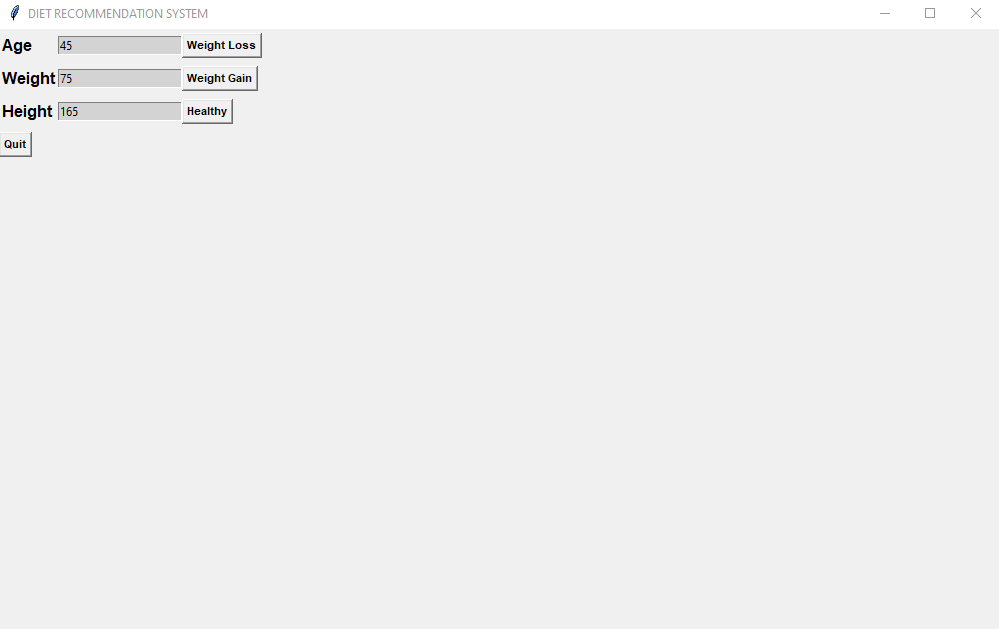

A person can consume these recommended food items for break fast alone as there will another pop up wherein 1- breakfast , 2 - lunch , 3 - dinner & I have selected 1 - breakfast

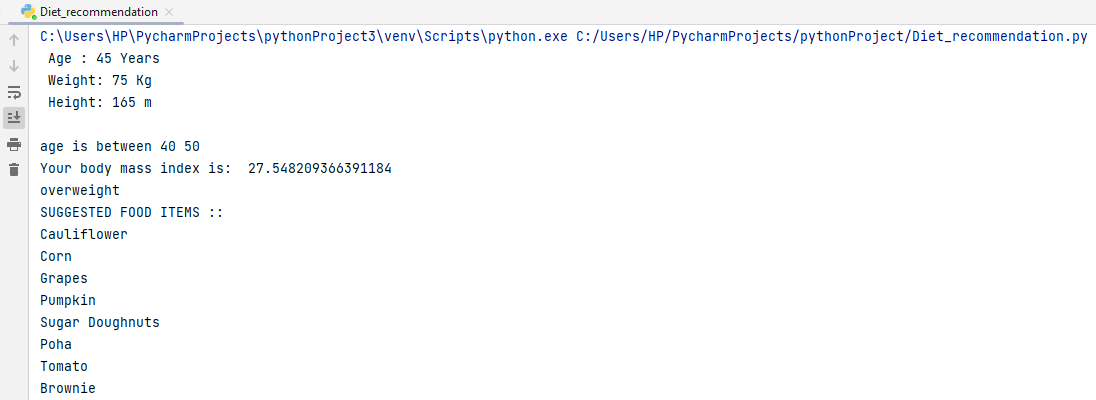

**Future Scope for personalized meal and diet recommendation system**    
Matrix factorisation methods of collaborative filtering can be applied, further Single Value Decomposition can be applied.
The module can be implemented as a cloud-based application. Packaged as a single entity, ready for production environment deployment.

###**FOR DRUG RECOMMENDATION SYSTEM**
I have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. I will build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
And separately I have also taken PCOD dataset for building the recommendation system for it.

In this project, I'm going to show how to use data science and machine learning knowledge and skills to solve this problem.

Machine Learning based solution
First Step: I've imported the patient's data set that has attributes about the patient and the most appropriate drug for them.

Second Step: I've analyzed the data by checking its data quality: missing values, outliers, data format, etc. After this, I've visualized the dataset to extract insights about the data.

Third Step: After checking the data quality and visualizing the data set, I've have pre-processed the data set: converted categorical values to numerical values.

Fourth Step: I've have then created two subsets from the orginal data set called:

X_train: Used to train the Machine Learning Models
X_test: Used to test the performance of the trained models
Fifth Step: Trained 3 Classifier Models: LGBM Classifier, Bagging Classifier and Decision Tree Classifier model. Checked the trained model's performance using the X_test set.

Sixth Step: Since all the models performed really well and achieved an accuracy score of 100%, I chose LGBM classifier model and saved it in the pickle format using joblib.

Seventh Step: Created a front-end app using HTML and CSS and integrated the pickle file with the app using the flask framework.

###IMPORTING THE DATASET AND PERFORMING EDA ON EACH DATASET

In [47]:
drug_df = pd.read_csv(r"/content/drive/MyDrive/drug200.csv")
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.36,drugY
1,47,M,LOW,HIGH,13.09,drugC
2,47,M,LOW,HIGH,10.11,drugC
3,28,F,NORMAL,HIGH,7.80,drugX
4,61,F,LOW,HIGH,18.04,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.57,drugC
196,16,M,LOW,HIGH,12.01,drugC
197,52,M,NORMAL,HIGH,9.89,drugX
198,23,M,NORMAL,NORMAL,14.02,drugX


In [48]:
#printing the shape
drug_df.shape

(200, 6)

In [49]:
#describing the dataset
drug_df.describe()

,Age,Na_to_K
count,200.00,200.00
mean,44.31,16.08
std,16.54,7.22
min,15.00,6.27
25%,31.00,10.45
50%,45.00,13.94
75%,58.00,19.38
max,74.00,38.25


In [50]:
#printing the information
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [51]:
#checking if there is null /missing values
drug_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [52]:
inf = pd.read_csv('/content/drive/MyDrive/PCOS_infertility.csv')
woinf = pd.read_excel('/content/drive/MyDrive/PCOS_data_without_infertility.xlsx', sheet_name= 'Full_new')

In [53]:
#printing the shape
inf.shape

(541, 6)

In [54]:
#describing the dataset
inf.describe()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
count,541.00,541.00,541.00,541.00,541.00
mean,271.00,10271.00,0.33,664.55,238.23
std,156.32,156.32,0.47,3348.92,1603.83
min,1.00,10001.00,0.00,1.30,0.11
25%,136.00,10136.00,0.00,1.99,1.99
50%,271.00,10271.00,0.00,20.00,1.99
75%,406.00,10406.00,1.00,297.21,97.63
max,541.00,10541.00,1.00,32460.97,25000.00


In [55]:
#printing the information
inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


In [56]:
#checking if there is any null / missing values
inf.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64

In [57]:
#printing the shape
woinf.shape

(541, 45)

In [58]:
#describing the dataset
woinf.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00,...,541.00,540.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00
mean,271.00,271.00,0.33,31.43,59.64,156.48,24.31,13.80,73.25,19.24,...,0.49,0.51,0.25,114.66,76.93,6.13,6.64,15.02,15.45,8.48
std,156.32,156.32,0.47,5.41,11.03,6.03,4.06,1.84,4.43,1.69,...,0.50,0.50,0.43,7.38,5.57,4.23,4.44,3.57,3.32,2.17
min,1.00,1.00,0.00,20.00,31.00,137.00,12.42,11.00,13.00,16.00,...,0.00,0.00,0.00,12.00,8.00,0.00,0.00,0.00,0.00,0.00
25%,136.00,136.00,0.00,28.00,52.00,152.00,21.64,13.00,72.00,18.00,...,0.00,0.00,0.00,110.00,70.00,3.00,3.00,13.00,13.00,7.00
50%,271.00,271.00,0.00,31.00,59.00,156.00,24.24,14.00,72.00,18.00,...,0.00,1.00,0.00,110.00,80.00,5.00,6.00,15.00,16.00,8.50
75%,406.00,406.00,1.00,35.00,65.00,160.00,26.63,15.00,74.00,20.00,...,1.00,1.00,0.00,120.00,80.00,9.00,10.00,18.00,18.00,9.80
max,541.00,541.00,1.00,48.00,108.00,180.00,38.90,18.00,82.00,28.00,...,1.00,1.00,1.00,140.00,100.00,22.00,20.00,24.00,24.00,18.00


In [59]:
#printing the information
woinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [60]:
#checking if there is any null / missing values
woinf.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

###PREPROCESSING 

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
drug_df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [63]:
drug_df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [64]:
drug_df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [65]:
drug_df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [66]:
drug_df['Sex'] = LabelEncoder().fit_transform(drug_df['Sex'])
drug_df['Cholesterol'] = LabelEncoder().fit_transform(drug_df['Cholesterol'])

In [67]:
drug_df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [68]:
drug_df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [69]:
drug_df['Sex'].value_counts()

1    104
0     96
Name: Sex, dtype: int64

In [70]:
drug_df['Cholesterol'].value_counts()

0    103
1     97
Name: Cholesterol, dtype: int64

In [71]:
dummy_BP = pd.get_dummies(drug_df["BP"], prefix="BP", prefix_sep="_")
dummy_BP

,BP_HIGH,BP_LOW,BP_NORMAL
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,0,1
198,0,0,1


In [72]:
dummy_BP.drop("BP_NORMAL", axis=1, inplace=True)

In [73]:
drug_df.drop("BP", axis=1, inplace=True)

In [74]:
#concatenation
drug_df = pd.concat([drug_df, dummy_BP], axis=1)
drug_df

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW
0,23,0,0,25.36,drugY,1,0
1,47,1,0,13.09,drugC,0,1
2,47,1,0,10.11,drugC,0,1
3,28,0,0,7.80,drugX,0,0
4,61,0,0,18.04,drugY,0,1
...,...,...,...,...,...,...,...
195,56,0,0,11.57,drugC,0,1
196,16,1,0,12.01,drugC,0,1
197,52,1,0,9.89,drugX,0,0
198,23,1,1,14.02,drugX,0,0


###VISUALIZATION

Text(0, 0.5, 'Count')

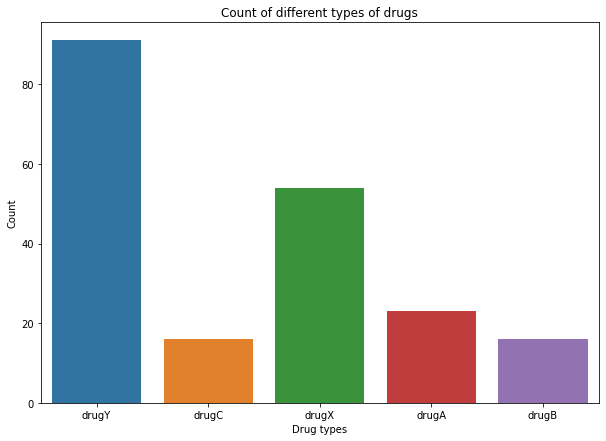

In [75]:
plt.figure(figsize=(10,7))
sns.countplot(drug_df["Drug"])
plt.title("Count of different types of drugs")
plt.xlabel("Drug types")
plt.ylabel("Count")

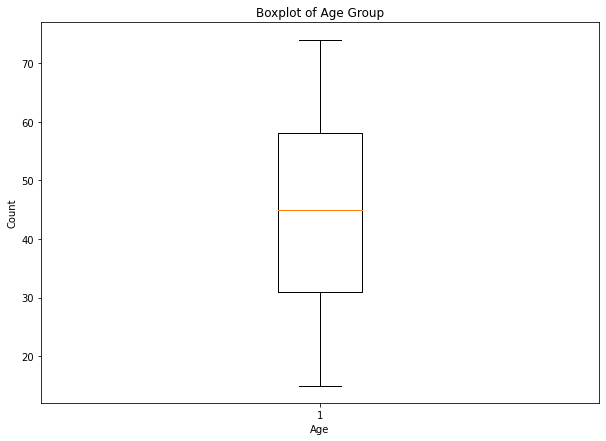

In [76]:
plt.figure(figsize=(10,7))
plt.boxplot(drug_df["Age"])
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

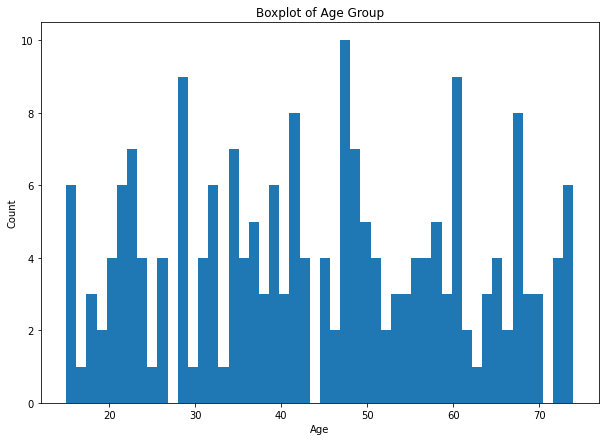

In [77]:
plt.figure(figsize=(10,7))
plt.hist(drug_df["Age"], bins=50)
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

###BUILDING MODELS AND FINDING ACCURACY FOR IT
###VISUALIZING IT WITH THE HELP OF CONFUSION MATRIX ( FOR NORMAL DATASET)
(i) decision tree 
(ii) bagging classifier

In [78]:
X = drug_df.drop("Drug", axis=1)
y = drug_df["Drug"]

In [79]:
#splitting the dataset for decision tree classifier
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3)

In [80]:
dt_clf = DecisionTreeClassifier()

In [81]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
y_preds_dt = dt_clf.predict(X_test)

In [83]:
print(accuracy_score(y_test, y_preds_dt))

0.9833333333333333


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier Model')

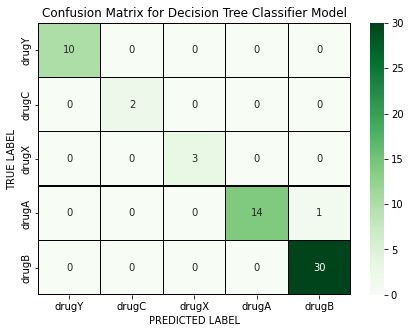

In [84]:
cm = confusion_matrix(y_test, y_preds_dt)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier Model')

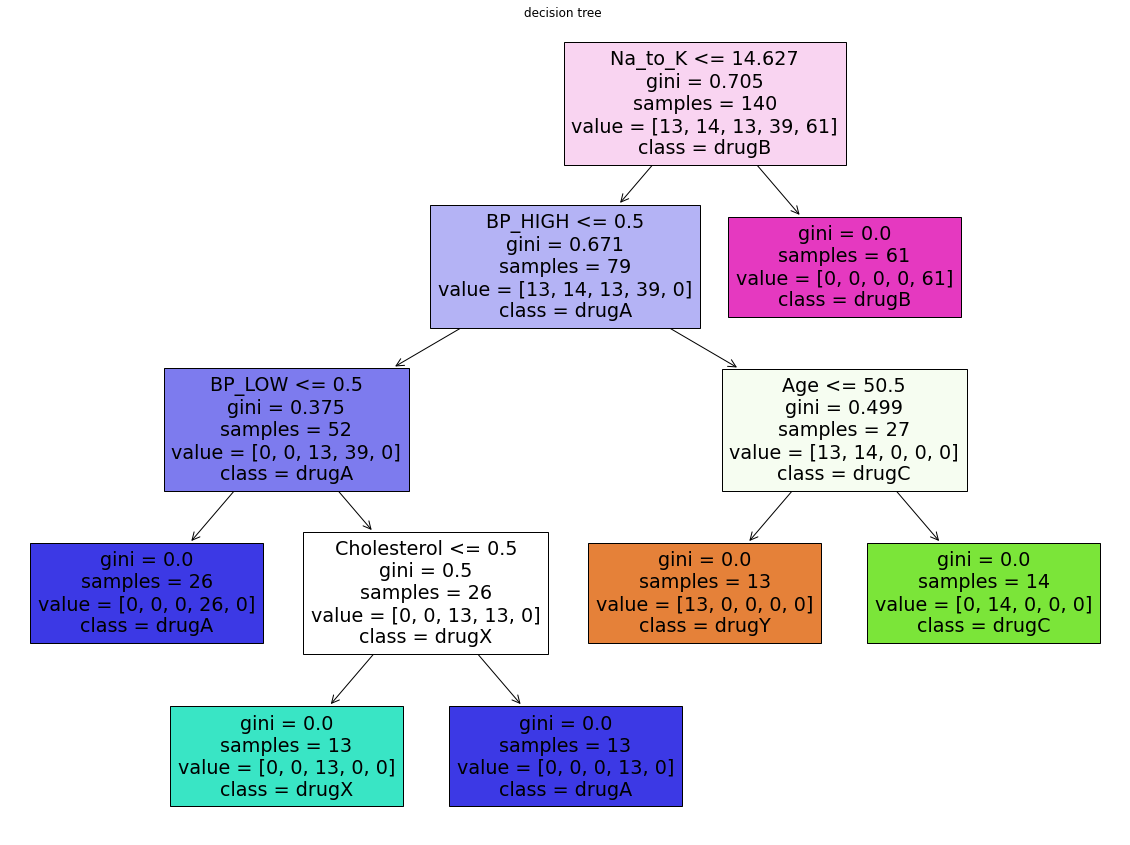

In [85]:
plt.figure(figsize=(20,15))
plot_tree(dt_clf, feature_names = list(X), class_names = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], filled = True)
plt.title('decision tree ')
plt.show()

In [86]:
bg_clf = BaggingClassifier(n_estimators=500)

In [87]:
bg_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=500)

In [88]:
y_preds_bg = bg_clf.predict(X_test)

In [89]:
print(accuracy_score(y_test, y_preds_bg))

0.9833333333333333


Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

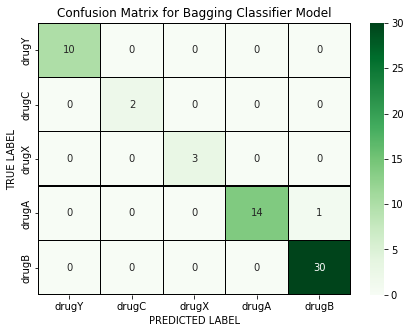

In [90]:
cm = confusion_matrix(y_test, y_preds_bg)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

In [91]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:04<00:00,  5.86it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.98               0.99    None      0.98   
BaggingClassifier                  0.98               0.99    None      0.98   
DecisionTreeClassifier             0.98               0.99    None      0.98   
RandomForestClassifier             0.98               0.99    None      0.98   
LogisticRegression                 0.98               0.98    None      0.98   
LGBMClassifier                     0.97               0.97    None      0.97   
XGBClassifier                      0.97               0.97    None      0.97   
LinearSVC                          0.97               0.96    None      0.97   
ExtraTreesClassifier               0.93               0.96    None      0.94   
PassiveAggressiveClassifier        0.95               0.95    None      0.95   
SGDClassifier                      0.95 

In [92]:
from joblib import dump
MODEL_NAME = "drug-recommender.pkl"
dump(dt_clf, MODEL_NAME)

['drug-recommender.pkl']

###PREPROCESSING FOR PCOS DATASET


TECH STACK USED
Libraries : numpy, pandas, sklearn.
Front-end : HTML, CSS
Backend : Flask Deployed using Heroku ( I am not able to deploy in heroku as there is an error in connecting with my github even after many attempts).
so I have stopped the process till html and css alone.

In [93]:
sns.set_style('darkgrid')
data = pd.merge(woinf,inf, on='Patient File No.', suffixes={'','_wo'},how='left')

In [94]:
data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [95]:
data =data.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo','II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)

In [96]:
data

,Sl. No,Patient File No.,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.60,152.00,19.30,15,78,22,...,0,1.00,0,110,80,3,3,18.00,18.00,8.50
1,2,2,0,36,65.00,161.50,24.92,15,74,20,...,0,0.00,0,120,70,3,5,15.00,14.00,3.70
2,3,3,1,33,68.80,165.00,25.27,11,72,18,...,1,1.00,0,120,80,13,15,18.00,20.00,10.00
3,4,4,0,37,65.00,148.00,29.67,13,72,20,...,0,0.00,0,120,70,2,2,15.00,14.00,7.50
4,5,5,0,25,52.00,161.00,20.06,11,72,18,...,0,0.00,0,120,80,3,4,16.00,14.00,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.00,164.59,18.50,17,72,16,...,0,0.00,0,110,70,1,0,17.50,10.00,6.70
537,538,538,0,30,63.20,158.00,25.30,15,72,18,...,0,0.00,0,110,70,9,7,19.00,18.00,8.20
538,539,539,0,36,54.00,152.00,23.40,13,74,20,...,0,0.00,0,110,80,1,0,18.00,9.00,7.30
539,540,540,0,27,50.00,150.00,22.20,15,74,20,...,1,0.00,0,110,70,7,6,18.00,16.00,11.50


In [97]:
data.shape

(541, 44)

In [98]:
data.describe()

,Sl. No,Patient File No.,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00,...,541.00,540.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00,541.00
mean,271.00,271.00,0.33,31.43,59.64,156.48,24.31,13.80,73.25,19.24,...,0.49,0.51,0.25,114.66,76.93,6.13,6.64,15.02,15.45,8.48
std,156.32,156.32,0.47,5.41,11.03,6.03,4.06,1.84,4.43,1.69,...,0.50,0.50,0.43,7.38,5.57,4.23,4.44,3.57,3.32,2.17
min,1.00,1.00,0.00,20.00,31.00,137.00,12.42,11.00,13.00,16.00,...,0.00,0.00,0.00,12.00,8.00,0.00,0.00,0.00,0.00,0.00
25%,136.00,136.00,0.00,28.00,52.00,152.00,21.64,13.00,72.00,18.00,...,0.00,0.00,0.00,110.00,70.00,3.00,3.00,13.00,13.00,7.00
50%,271.00,271.00,0.00,31.00,59.00,156.00,24.24,14.00,72.00,18.00,...,0.00,1.00,0.00,110.00,80.00,5.00,6.00,15.00,16.00,8.50
75%,406.00,406.00,1.00,35.00,65.00,160.00,26.63,15.00,74.00,20.00,...,1.00,1.00,0.00,120.00,80.00,9.00,10.00,18.00,18.00,9.80
max,541.00,541.00,1.00,48.00,108.00,180.00,38.90,18.00,82.00,28.00,...,1.00,1.00,1.00,140.00,100.00,22.00,20.00,24.00,24.00,18.00


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   Target                  541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [100]:
data.isnull().sum()

Sl. No                    0
Patient File No.          0
Target                    0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [101]:
# Dropping unnecessary features.

data = data.drop(["Sl. No","Patient File No."],axis = 1)

In [102]:
# Having a look at the data with dtype objects.

data["AMH(ng/mL)"].head() 

0   2.07
1   1.53
2   6.63
3   1.22
4   2.26
Name: AMH(ng/mL), dtype: object

In [103]:
data["II    beta-HCG(mIU/mL)"].head()

0     1.99
1     1.99
2   494.08
3     1.99
4   801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [104]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [105]:
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)

data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)

data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [106]:
data.columns = [col.strip() for col in data.columns]

In [107]:
colors = ['#670067','#008080']

In [108]:
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count
     
    """
    # Get feature
    var = data[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

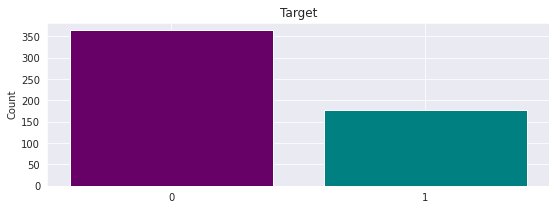

Target: 
 0    364
1    177
Name: Target, dtype: int64


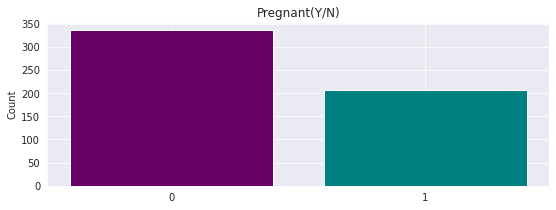

Pregnant(Y/N): 
 0    335
1    206
Name: Pregnant(Y/N), dtype: int64


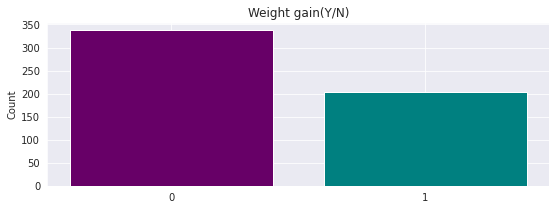

Weight gain(Y/N): 
 0    337
1    204
Name: Weight gain(Y/N), dtype: int64


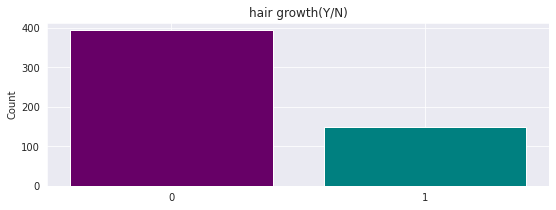

hair growth(Y/N): 
 0    393
1    148
Name: hair growth(Y/N), dtype: int64


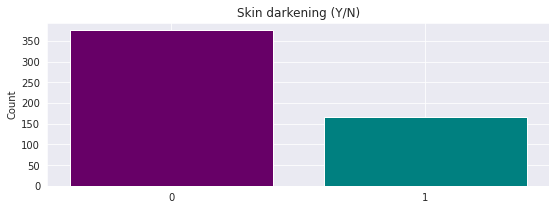

Skin darkening (Y/N): 
 0    375
1    166
Name: Skin darkening (Y/N), dtype: int64


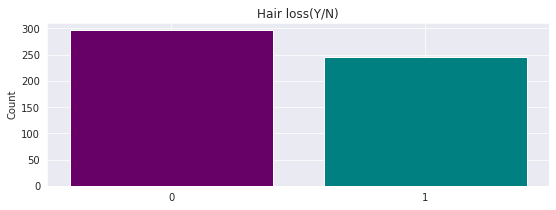

Hair loss(Y/N): 
 0    296
1    245
Name: Hair loss(Y/N), dtype: int64


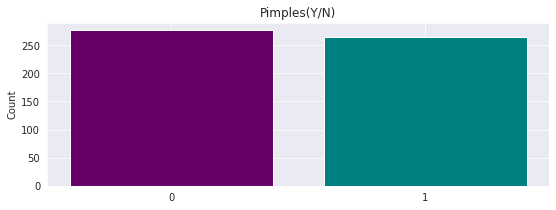

Pimples(Y/N): 
 0    276
1    265
Name: Pimples(Y/N), dtype: int64


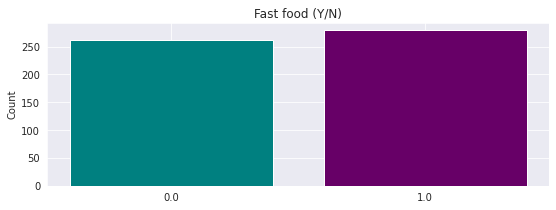

Fast food (Y/N): 
 1.00    279
0.00    262
Name: Fast food (Y/N), dtype: int64


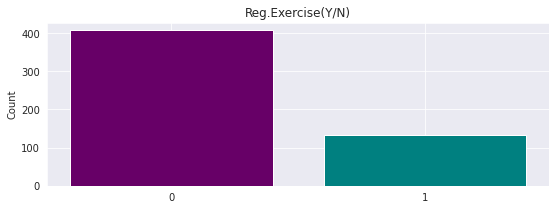

Reg.Exercise(Y/N): 
 0    407
1    134
Name: Reg.Exercise(Y/N), dtype: int64


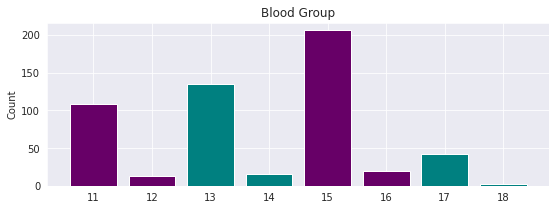

Blood Group: 
 15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64


In [109]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

In [110]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[1])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

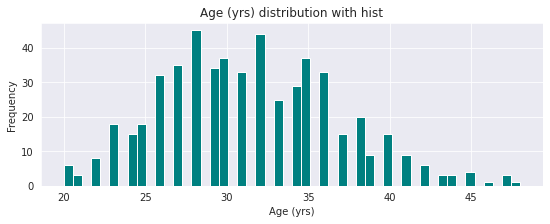

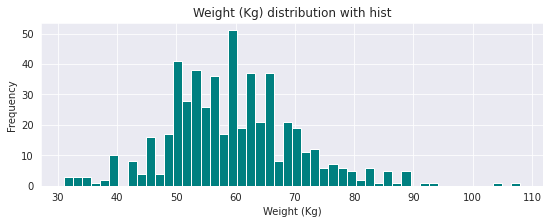

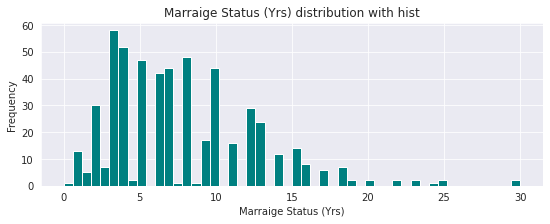

In [111]:
numericVar = ["Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

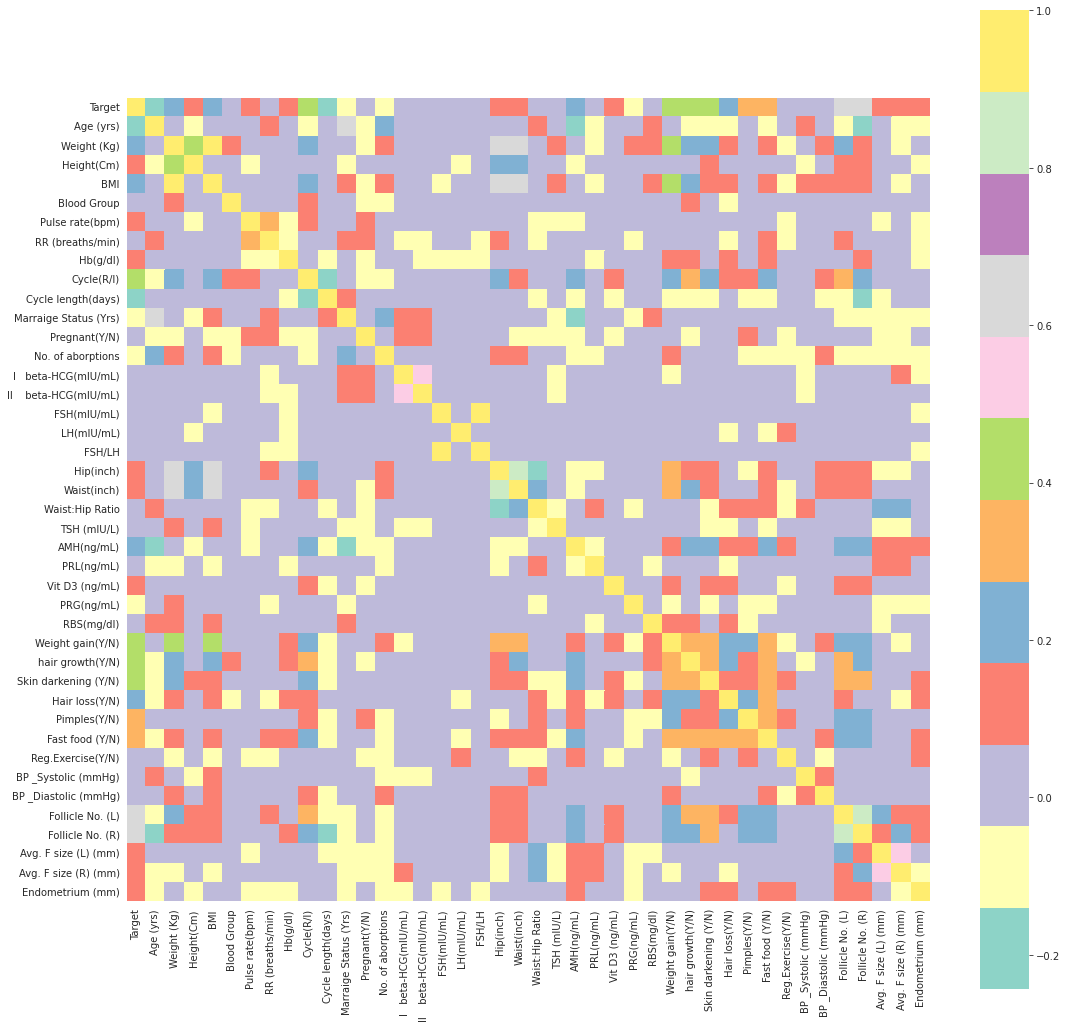

In [112]:
# Examining a correlation matrix of all the features.

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Set3", square=True);

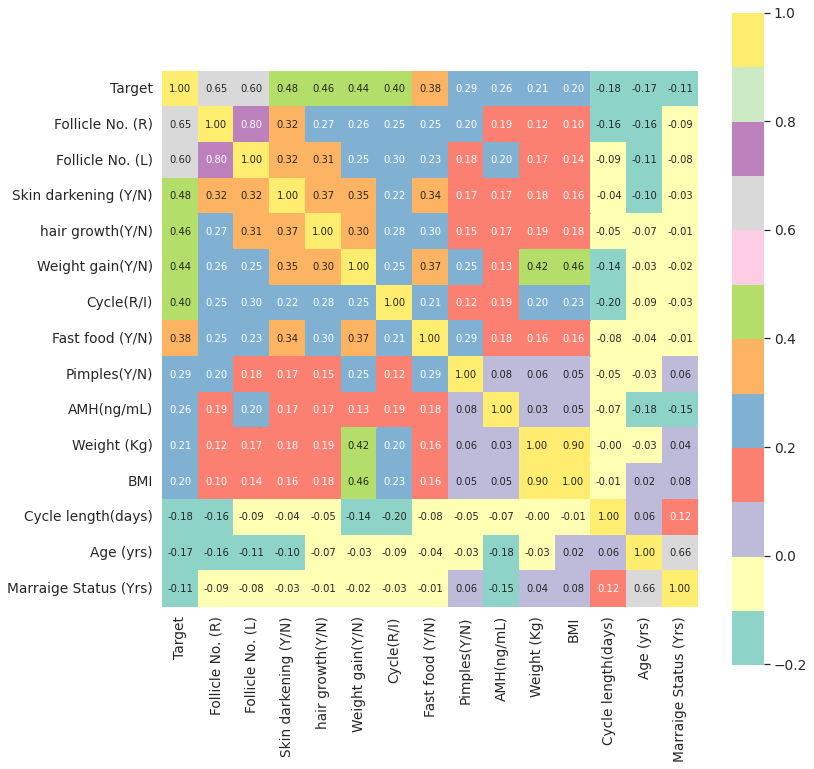

In [113]:
# Having a look at features bearing significant correlation.

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k,'Target')['Target'].index 
cols_n = corrmat.nsmallest(l, 'Target')['Target'].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Set3", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

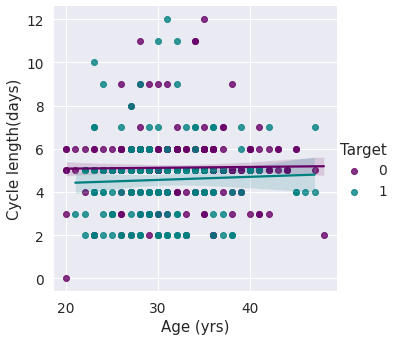

In [114]:
# Length of menstrual phase in PCOS vs normal 

fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="Target",palette=colors)
plt.show(fig)

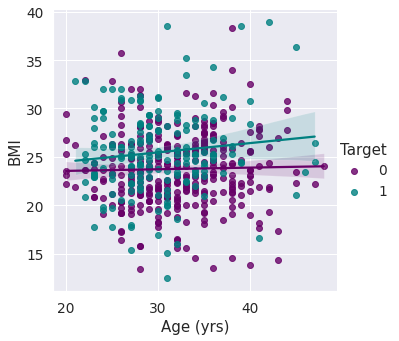

In [115]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 

fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="Target", palette= colors )
plt.show(fig)

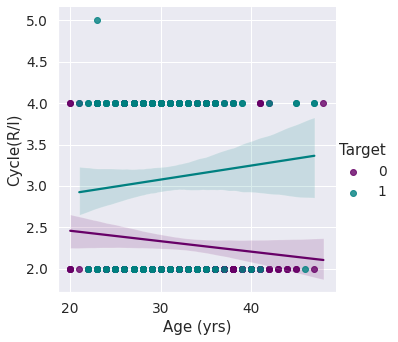

In [116]:
# Cycle IR wrt age 

sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="Target",palette=colors)
plt.show()

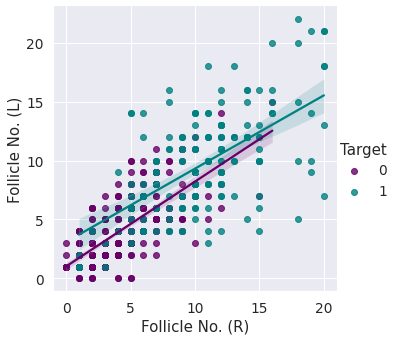

In [117]:
# Distribution of follicles in both ovaries.

sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="Target",palette=colors)
plt.show()

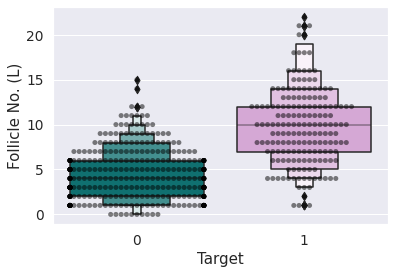

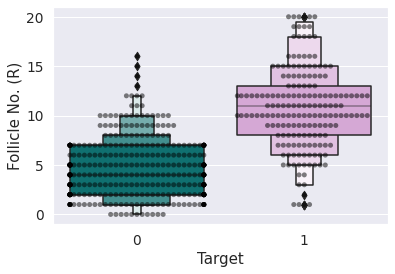

In [118]:
# Exploring the above observation with the help of Boxplot

color = ["teal", "plum"]
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

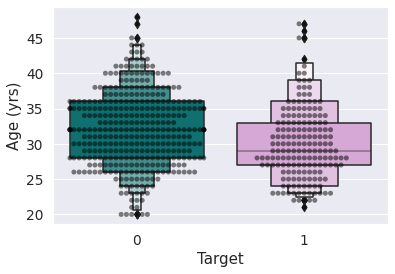

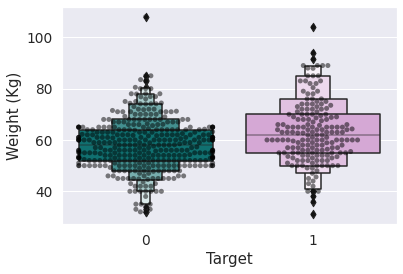

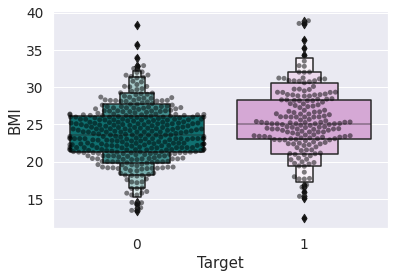

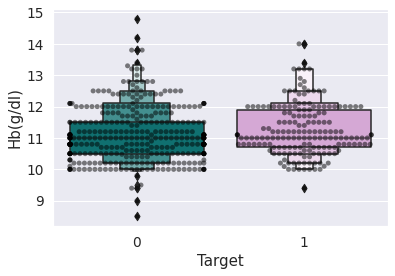

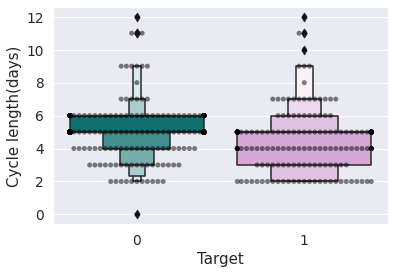

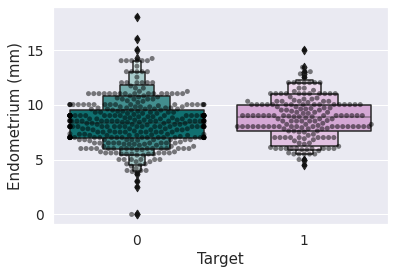

In [119]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

###BUILDING THE MODEL 

In [120]:
#Assiging the features (X)and target(y).

X= data.drop(labels = ["Target"],axis = 1)
y=data.Target

In [121]:
#Splitting the data into test and training sets.

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [122]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 378
X_test 163
y_train 378
y_test 163


LOGISTIC REGRESSION

In [123]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 88.1
Testing Accuracy: % 83.44


In [124]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

# Decision Tree
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

# SVM
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

# Random Forest
rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

# Logistic Regression
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

# KNN
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [125]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100,2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   32.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


84.68
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    7.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


73.53
Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.1min finished


91.55
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


85.21
Fitting 10 folds for each of 40 candidates, totalling 400 fits
77.23


[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.7s finished


In [126]:
best_estimators

[DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42),
 SVC(C=10, gamma=0.001, random_state=42),
 RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500,
                        random_state=42),
 LogisticRegression(C=10.0, random_state=42),
 KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')]

In [127]:
dt = best_estimators[0]
svm = best_estimators[1]
rf = best_estimators[2]
lr = best_estimators[3]
knn = best_estimators[4]

In [128]:
# XGBRF Classifier
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=random_state)
xgb_clf.fit(X_train,y_train)
acc_xgb_clf_train = round(xgb_clf.score(X_train, y_train)*100,2) 
acc_xgb_clf_test = round(xgb_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_xgb_clf_train)
print("Training Accuracy: % {}".format(acc_xgb_clf_train))
print("Testing Accuracy: % {}".format(acc_xgb_clf_test))

Training Accuracy: % 92.59
Testing Accuracy: % 84.66


In [129]:
# CatBoost Classifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train)
acc_cat_clf_train = round(cat_clf.score(X_train, y_train)*100,2) 
acc_cat_clf_test = round(cat_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_cat_clf_train)
print("Training Accuracy: % {}".format(acc_cat_clf_train))
print("Testing Accuracy: % {}".format(acc_cat_clf_test))

Learning rate set to 0.0068
0:	learn: 0.6881333	total: 54.4ms	remaining: 54.3s
1:	learn: 0.6812945	total: 62.6ms	remaining: 31.2s
2:	learn: 0.6752264	total: 71.8ms	remaining: 23.9s
3:	learn: 0.6689033	total: 80.9ms	remaining: 20.1s
4:	learn: 0.6615982	total: 90ms	remaining: 17.9s
5:	learn: 0.6568188	total: 104ms	remaining: 17.2s
6:	learn: 0.6513956	total: 108ms	remaining: 15.4s
7:	learn: 0.6466354	total: 113ms	remaining: 14s
8:	learn: 0.6418887	total: 117ms	remaining: 12.9s
9:	learn: 0.6361250	total: 122ms	remaining: 12s
10:	learn: 0.6301860	total: 126ms	remaining: 11.3s
11:	learn: 0.6245031	total: 130ms	remaining: 10.7s
12:	learn: 0.6196194	total: 135ms	remaining: 10.2s
13:	learn: 0.6136028	total: 139ms	remaining: 9.8s
14:	learn: 0.6082609	total: 144ms	remaining: 9.42s
15:	learn: 0.6036177	total: 148ms	remaining: 9.1s
16:	learn: 0.5983978	total: 152ms	remaining: 8.81s
17:	learn: 0.5948788	total: 157ms	remaining: 8.56s
18:	learn: 0.5899675	total: 161ms	remaining: 8.33s
19:	learn: 0.585

In [130]:
model_list = ['Decision Tree','SVC','RandomForest','Logistic Regression','KNearestNeighbours','XGBRF','CatBoostClassifier']

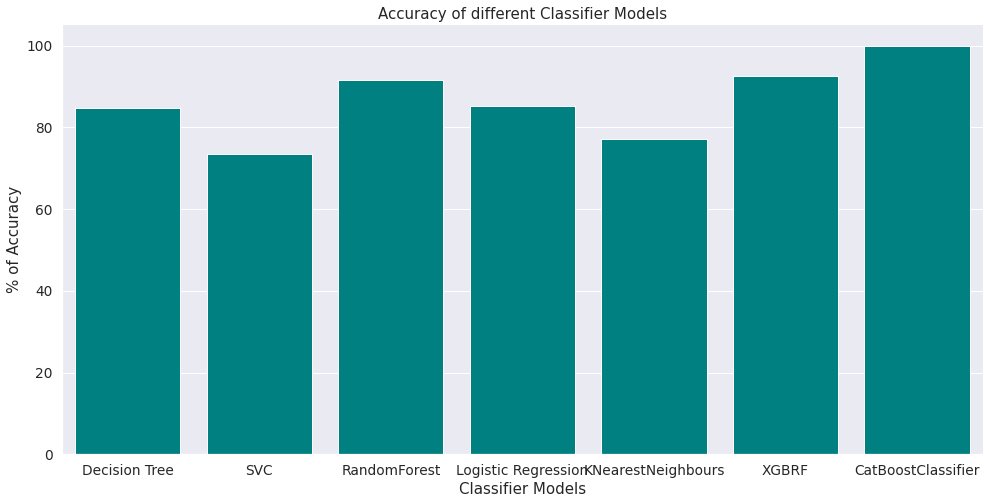

In [131]:
fg = sns.factorplot(x = model_list, y = cv_result, size= 7, aspect=2 ,color= colors[1], saturation=5,kind='bar', data=data)
plt.title('Accuracy of different Classifier Models')
plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')

plt.show()

In [132]:
# Plotly Bar Chart:
trace1 = go.Bar(
                x = model_list,
                y = cv_result,
                marker = dict(color = 'rgb(32, 55, 110)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [133]:
model = [dt,svm,rf,lr,knn,xgb_clf,cat_clf]
predictions = []

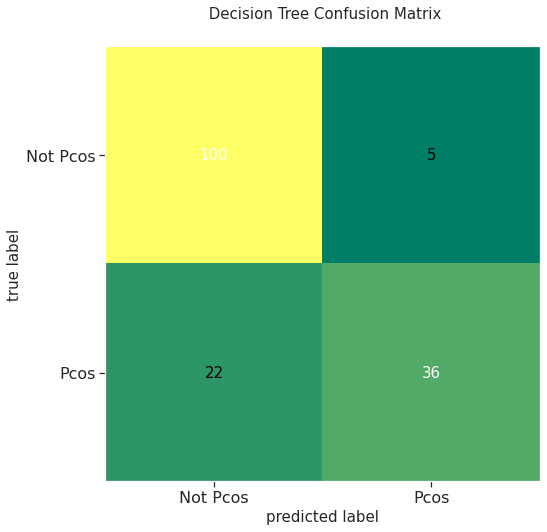

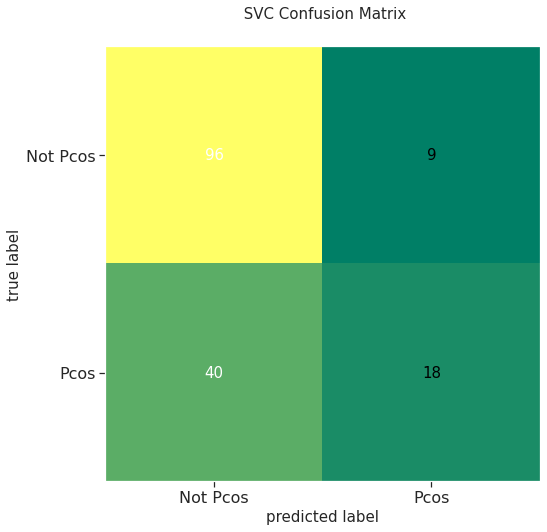

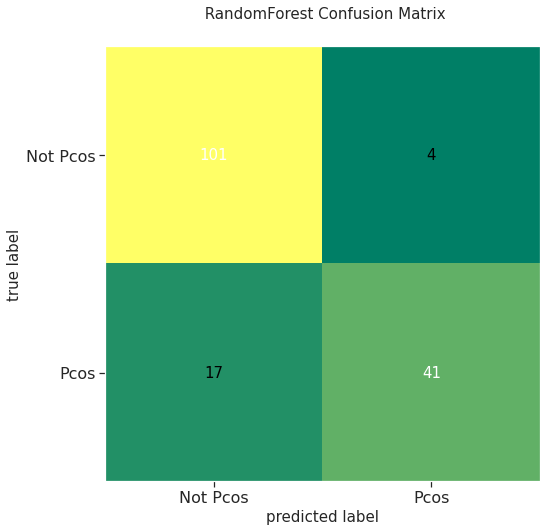

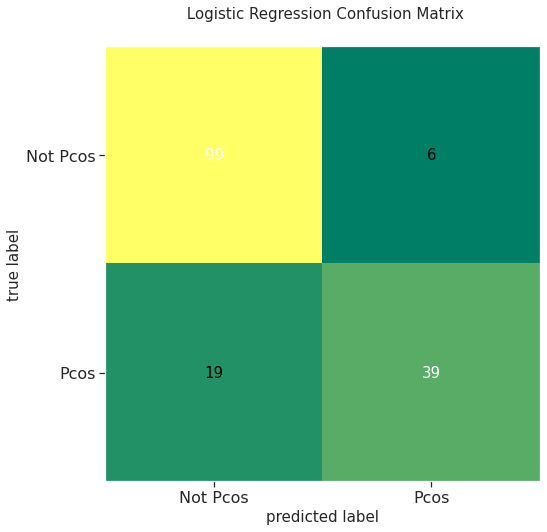

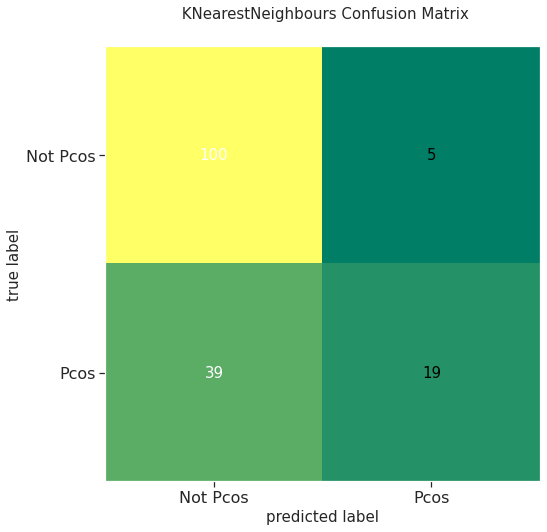

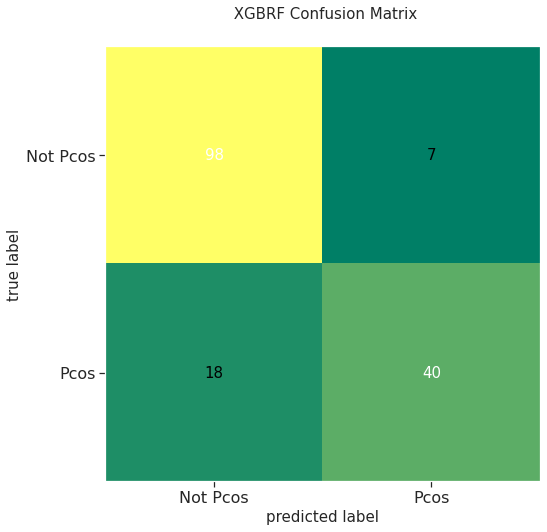

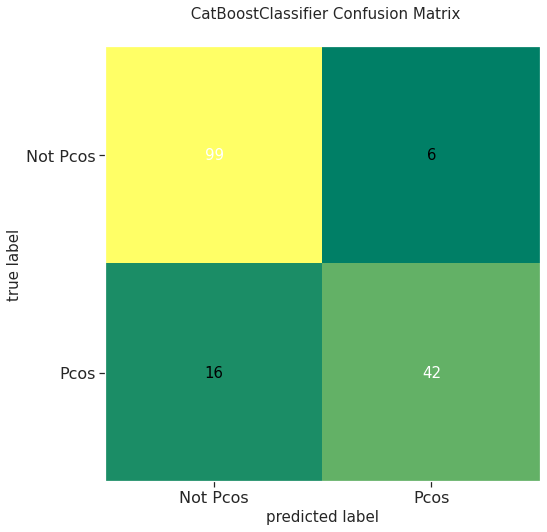

In [134]:
for i in model:
    predictions.append(i.predict(X_test))
for j in range(7):
    cm = confusion_matrix(y_test, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.summer)
    plt.title(" {} Confusion Matrix".format(model_list[j]))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()

In [135]:
from joblib import dump
MODEL_NAME = "pcos recommender.pkl"
dump(cat_clf, MODEL_NAME)

['pcos recommender.pkl']

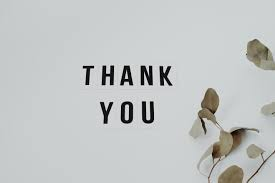